<a href="https://colab.research.google.com/github/YahyaHussain/AIML_Project_and_Labs/blob/main/AIML_Module_1_Lab_2_Machine_learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 2
# Machine learning terms and metrics


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [66]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int64) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


Here is a function for calculating the 1-nearest neighbours

In [67]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [68]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [69]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [70]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [71]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [72]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [73]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [74]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [75]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [76]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

In [77]:
accuracy_on_increasing = []
test_accuracy = []

rnd_accuracy_on_increasing = []
rnd_test_accuracy = []

percentages = np.arange(10, 100, 5)
len_percent = len(percentages)

index = []
percentage_len = []

for idx, i in enumerate(percentages):
  # print(f'{idx+1} / {len_percent}')
  index.append(idx + 1)
  percentage_len.append(len_percent)
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, (100-i)/100)

  # Nearest Neighbor
  valpred = NN(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  accuracy_on_increasing.append(valAccuracy)

  # Random Classifier
  valpred = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  rnd_accuracy_on_increasing.append(valAccuracy)

print('Length of increasing accuracy: ', len(accuracy_on_increasing))

Length of increasing accuracy:  18


In [78]:
extreme_points = [0.1, 99.9]
extreme_val_acc = []
extreme_test_acc = []

rnd_extreme_val_acc = []
rnd_extreme_test_acc = []

for i in extreme_points:
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, (100-i)/100)

  # Neignest Neignbor
  valpred = NN(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  extreme_val_acc.append(valAccuracy)

  # Random Classifier
  valpred = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  rnd_extreme_val_acc.append(valAccuracy)

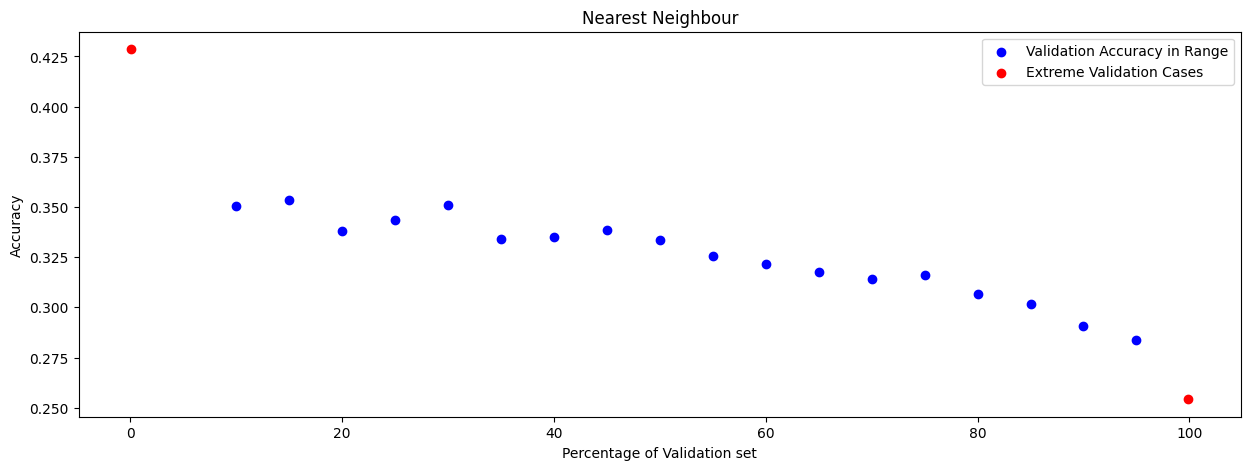

In [79]:
plt.figure(figsize=(15, 5))

plt.title("Nearest Neighbour")

plt.scatter(percentages, accuracy_on_increasing, label="Validation Accuracy in Range", color='blue')

plt.scatter(extreme_points, extreme_val_acc, label="Extreme Validation Cases", color='red')

plt.xlabel("Percentage of Validation set")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Solution:**
1. There is no effect for the accuracy if we increase the percentage of validation set. However, if we reduce the percentage of validation set the accuracy decreases.

1. The size of the train and validation set affects how well we can predict the accuracy on the test set using the validation set in the following ways:

  **Larger train set:** A larger train set will generally lead to more accurate model, because the model will have more data to learn from.

  **Larger validation set:** A larger validation set will give us a more reliable estimate of the model's performance on the test set, this is because the validation set will be more representative of the overall dataset.

  However, if we increase the size of the validation set, we will have less data for training. This can lead to underfitting, which is when the model is not able to learn the underlying pattern in the data.

1. From above we can say it is good to put 60% in training set, 20% in validation set and 20% in test set

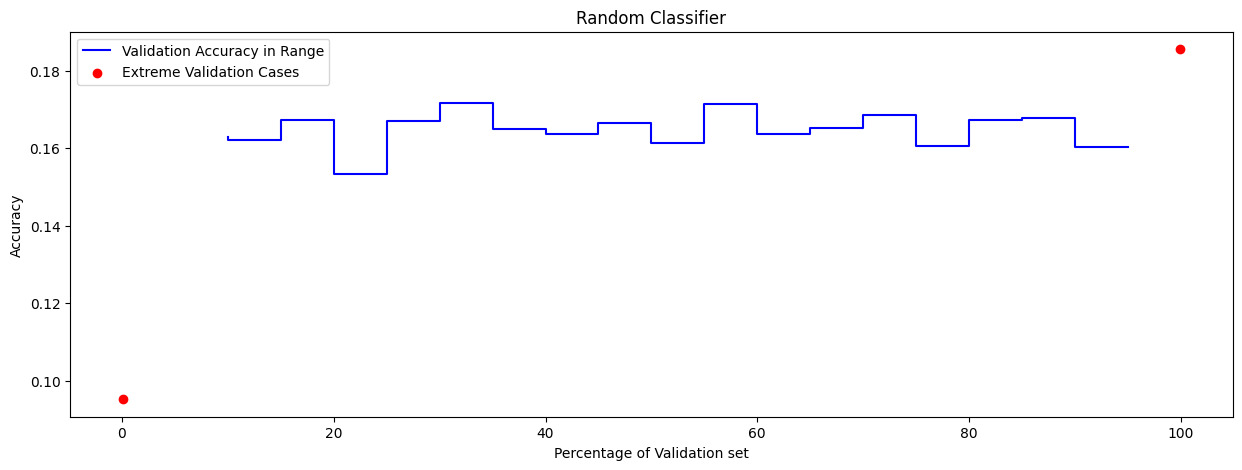

In [80]:
plt.figure(figsize=(15, 5))

plt.title("Random Classifier")

plt.plot(percentages, rnd_accuracy_on_increasing, label="Validation Accuracy in Range", drawstyle='steps', color='blue')

plt.scatter(extreme_points, rnd_extreme_val_acc, label="Extreme Validation Cases", color='red')

plt.xlabel("Percentage of Validation set")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In Random Classifier the classification accuracy does not depend on the split of dataset

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [81]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [82]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3412175468525163
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


In [83]:
split_accuracies = []
av_accuracies = []

def MyAverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0

  for i in range(iterations):

    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)

    valpred = classifier(traindata, trainlabel, valdata)
    split_accuracy = Accuracy(vallabel, valpred)

    split_accuracies.append(split_accuracy)

    print(f'Split number {i} validation accuracy: {split_accuracy}')
    accuracy += split_accuracy

  return accuracy/iterations

for i in range(5):

  avg_accuracy = MyAverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN)
  av_accuracies.append(avg_accuracy)

  print('Average validation accuracy: ', avg_accuracy)
  print()

testpred = NN(alltraindata, alltrainlabel, testdata)
print('Test accuracy: ', Accuracy(testlabel, testpred))

Split number 0 validation accuracy: 0.33937514905795374
Split number 1 validation accuracy: 0.3392514395393474
Split number 2 validation accuracy: 0.341732661387089
Split number 3 validation accuracy: 0.32787686293672125
Split number 4 validation accuracy: 0.3432872655478776
Split number 5 validation accuracy: 0.3408817152493375
Split number 6 validation accuracy: 0.3415853368245656
Split number 7 validation accuracy: 0.3444391179290508
Split number 8 validation accuracy: 0.33810888252148996
Split number 9 validation accuracy: 0.3363463368220742
Average validation accuracy:  0.33928847678155066

Split number 0 validation accuracy: 0.35224022878932315
Split number 1 validation accuracy: 0.3396955786421841
Split number 2 validation accuracy: 0.33414278776104905
Split number 3 validation accuracy: 0.34619995204986814
Split number 4 validation accuracy: 0.3325147347740668
Split number 5 validation accuracy: 0.337709700948213
Split number 6 validation accuracy: 0.3506849315068493
Split numb

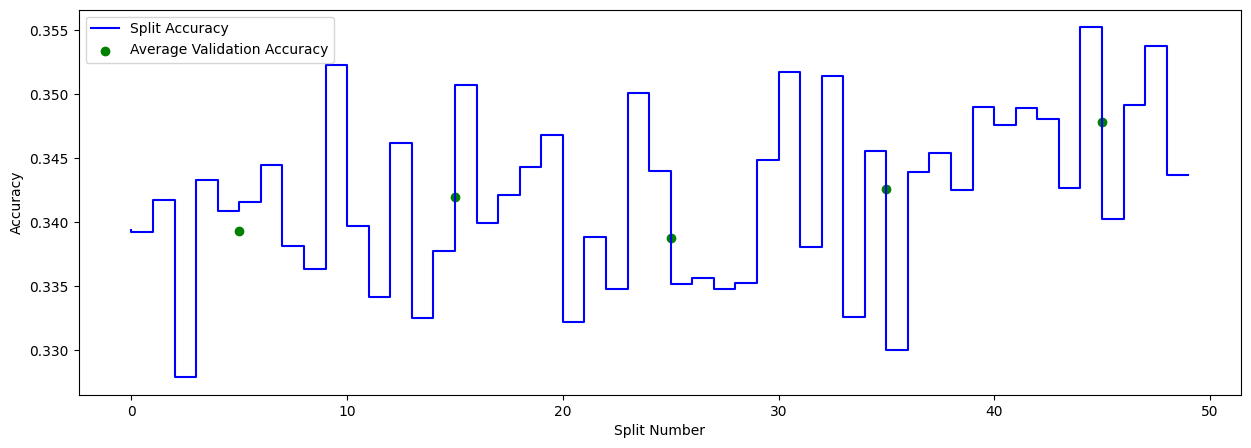

In [84]:
plt.figure(figsize = (15, 5))
plt.plot(split_accuracies, label = 'Split Accuracy', drawstyle='steps', color='blue')
plt.scatter([5,15,25,35,45], av_accuracies, label="Average Validation Accuracy", color='green')

plt.xlabel('Split Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1. Yes, averaging the validation accuracy across multiple splits gives better results.

1. No, it doesn't give a good estimate of the test accurary. The average validation accuracy almost remains constant and slightly lesser than the test accuracy.

In [86]:
val_acc = []
test_acc = []
for i in range(1, 21):
  print(f'{i} / 20')
  acc = AverageAccuracy(alltraindata, alltrainlabel, 75/100, i, classifier=NN)
  val_acc.append(acc)
  testpred = NN(alltraindata, alltrainlabel, testdata)
  test_acc.append(Accuracy(testlabel, testpred))

1 / 20
2 / 20
3 / 20
4 / 20
5 / 20
6 / 20
7 / 20
8 / 20
9 / 20
10 / 20
11 / 20
12 / 20
13 / 20
14 / 20
15 / 20
16 / 20
17 / 20
18 / 20
19 / 20
20 / 20


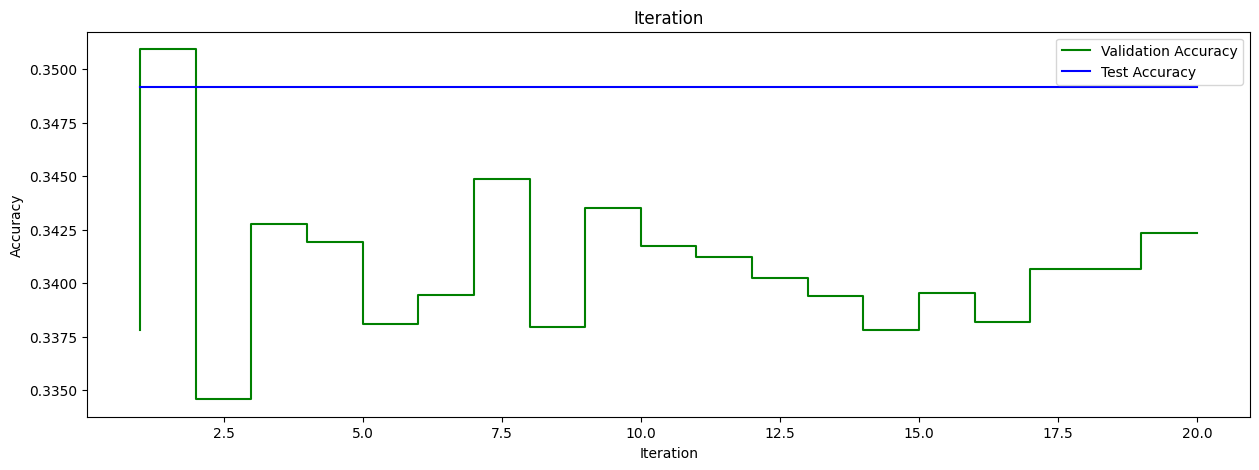

In [87]:
plt.figure(figsize=(15, 5))

plt.title("Iteration")

plt.plot(np.arange(1, 21), val_acc, label="Validation Accuracy", drawstyle='steps', color='green')
plt.plot(np.arange(1, 21), test_acc, label="Test Accuracy", drawstyle='steps', color='blue')

plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

3. Too many iteration doesn't mean it is too good model. If we increase the number of iterations, the accuracy will also increase and saturate very quickly.

4. If we deal with a very small train dataset or validation dataset by increasing iteration, it won't have a significant impact. If the training dataset is reduced the accuracy will get reduced too and viceversa. But if the test data is reduced, more training data will be considered and the accuracy will increase (i.e., inversely proportional) and may predict false value. Tthe probability of false prediction may only decrease for small sets.